Load all essential libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load dataset

In [4]:
 data=pd.read_csv('/content/online_sales_dataset.csv')

View first 10 rows from the dataset

In [5]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
5,744167,SKU_1006,Office Chair,47,2020-01-01 05:00,70.16,53887.0,Sweden,0.480000,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium
6,210268,SKU_1087,USB Cable,25,2020-01-01 06:00,85.74,46567.0,Belgium,0.150000,Bank Transfer,12.92,Stationery,Online,Not Returned,FedEx,Amsterdam,High
7,832180,SKU_1597,Notebook,8,2020-01-01 07:00,95.65,75098.0,Norway,0.040000,Bank Transfer,6.48,Electronics,In-store,Not Returned,Royal Mail,Amsterdam,Low
8,154886,SKU_1907,Wireless Mouse,19,2020-01-01 08:00,98.19,87950.0,Belgium,0.050000,paypall,12.56,Apparel,Online,Not Returned,UPS,Berlin,High
9,237337,SKU_1866,Headphones,40,2020-01-01 09:00,98.17,39718.0,Italy,0.160000,Bank Transfer,7.71,Apparel,Online,Not Returned,Royal Mail,London,Low


Find if there are any null values.

In [6]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,4978
Country,0
Discount,0
PaymentMethod,0


Remove null values from the dataset.

In [7]:
data=data.dropna()

Verify if null values removed

In [8]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Discount,0
PaymentMethod,0


Check for duplicate values if any

In [9]:
data.duplicated().sum()

0

Find Unique catagories in unique columns

In [10]:
unique_categories = data['Description'].unique()
unique_categories

array(['White Mug', 'Headphones', 'Desk Lamp', 'Office Chair',
       'USB Cable', 'Notebook', 'Wireless Mouse', 'Blue Pen',
       'Wall Clock', 'T-shirt', 'Backpack'], dtype=object)

## VISUALIZATION

Sales Trends

Bar plot of description and quantity

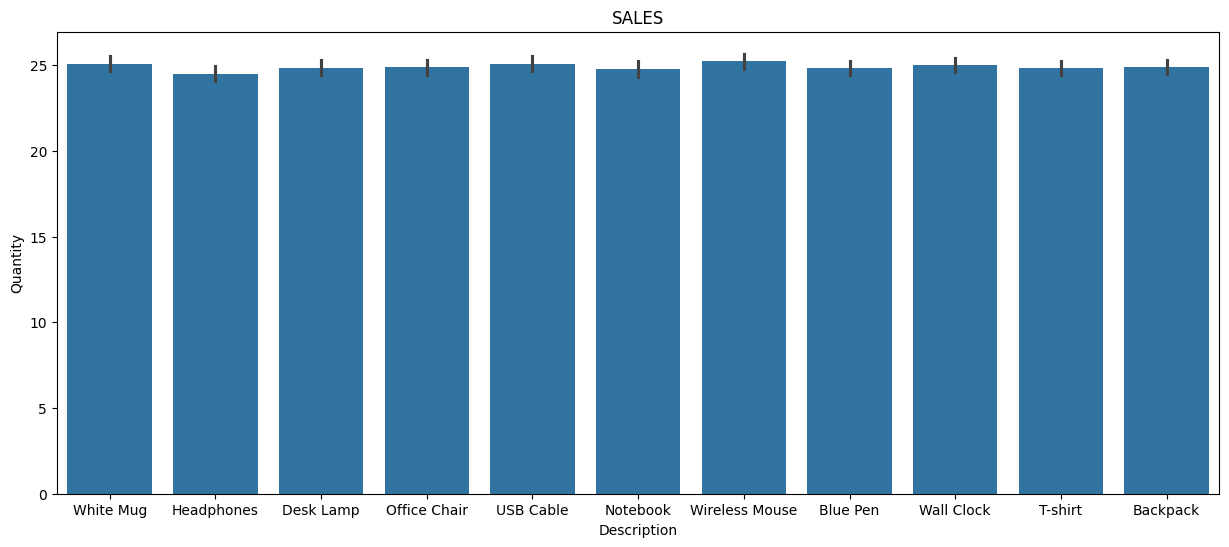

In [11]:
plt.figure(figsize=(15,6 ))
sns.barplot(x='Description', y='Quantity', data=data)
plt.xlabel('Description')
plt.ylabel('Quantity')
plt.title('SALES')
plt.show()

Top customers

In [12]:
customer_sales = data.groupby('CustomerID')['Quantity'].sum()
top_customers = customer_sales.sort_values(ascending=False)
print(top_customers)

CustomerID
14461.0    212
44086.0    172
24149.0    169
75447.0    166
11514.0    160
          ... 
71899.0      1
71904.0      1
97058.0      1
71962.0      1
55054.0      1
Name: Quantity, Length: 35389, dtype: int64


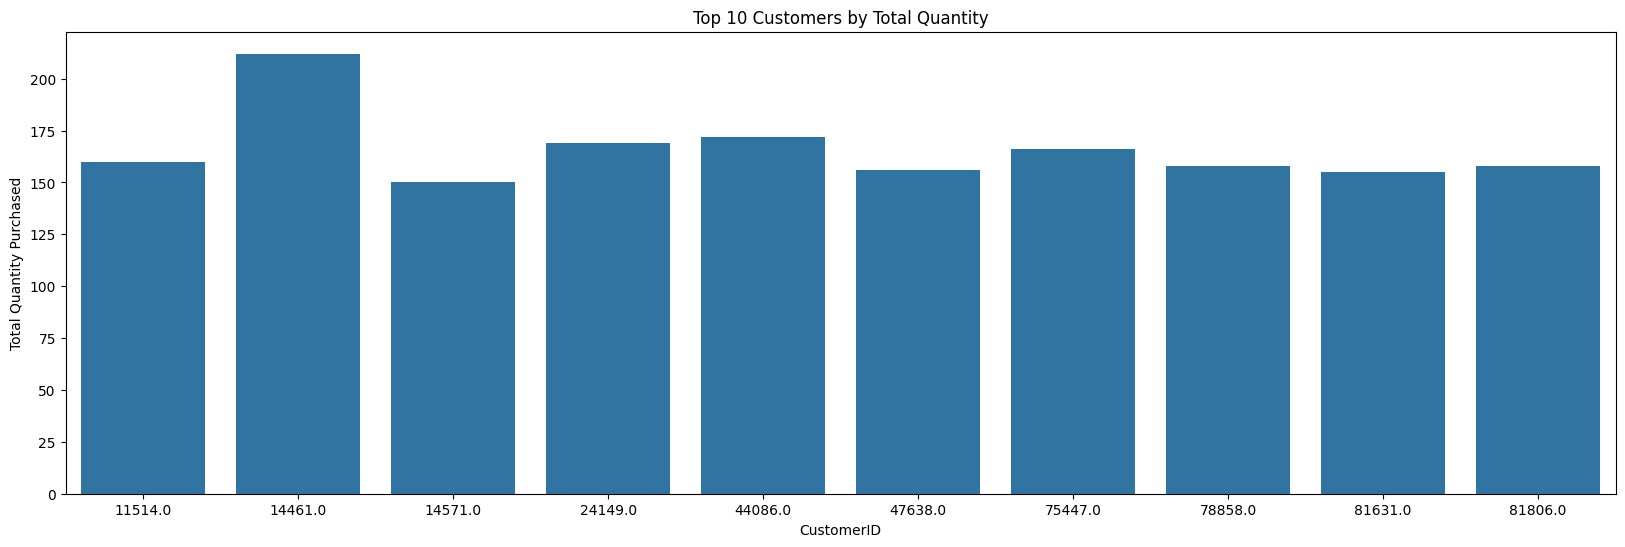

In [13]:
plt.figure(figsize=(20,6))
sns.barplot(x=top_customers.index[:10], y=top_customers.values[:10])
plt.xlabel('CustomerID')
plt.ylabel('Total Quantity Purchased')
plt.title('Top 10 Customers by Total Quantity')
plt.show()

Most preffered payment methord by the custormers


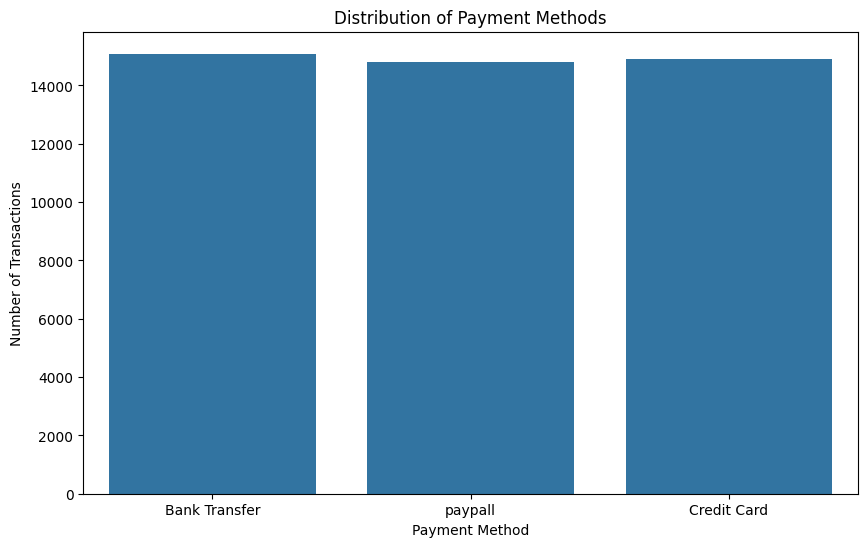

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', data=data)
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Payment Methods')
plt.show()

This is indicated by the bar for "Bank Transfer" having the highest value on the y-axis. This suggests that more transactions were made using bank transfers compared to PayPal and Credit Card.

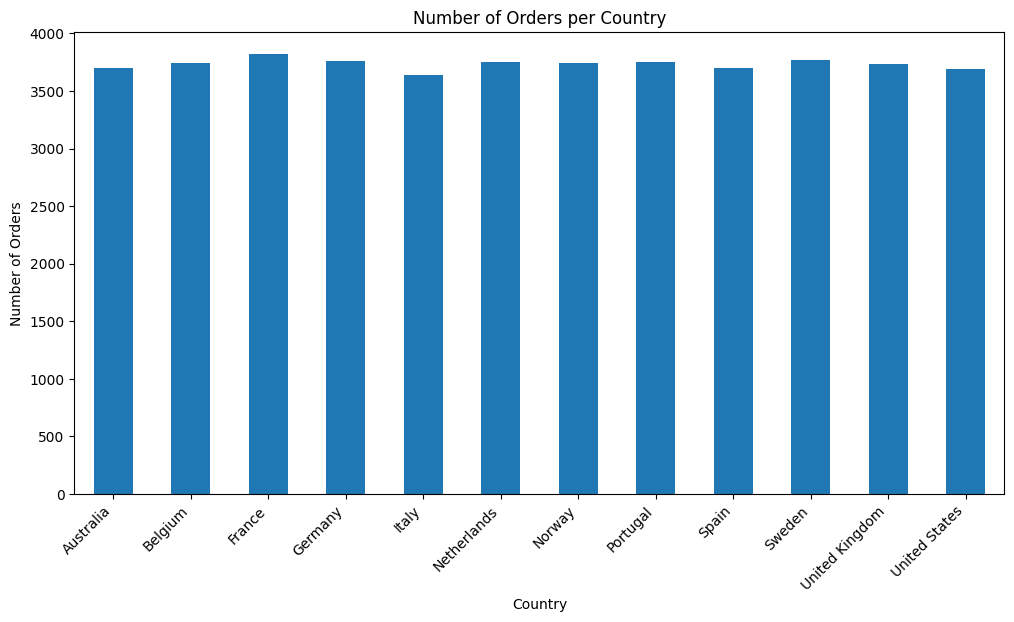

In [15]:
country_orders = data.groupby('Country')['InvoiceNo'].count()
plt.figure(figsize=(12, 6))
country_orders.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

United States, UK, and Germany these three countries consistently place the highest number of orders.There isn't a drastic difference in order counts between the top countries. The number of orders appears to be relatively evenly distributed among the top 10.

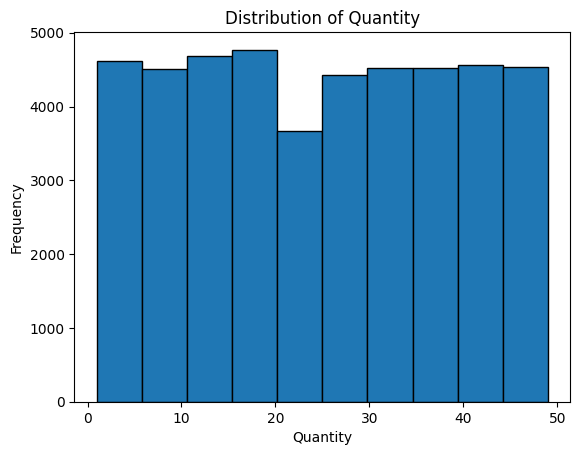

In [16]:
plt.hist(data['Quantity'],edgecolor='black')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

Correlation heatmap


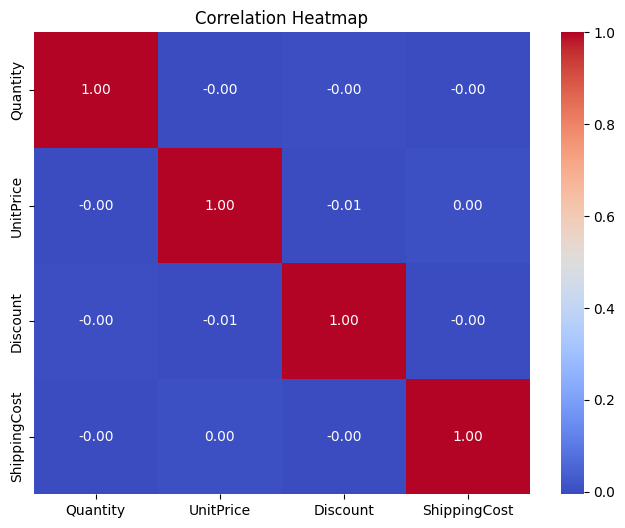

In [17]:
correlation = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']
correlation_matrix = data[correlation].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()